**MOVIE RATING PREDICTION**

**Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the dataset**

In [ ]:
data=pd.read_excel("/content/sample_data/IMDb Movies India.xlsx")
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
data.tail(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15499,Zulm Ka Jawab,-1995.0,NaN,Action,NaN,NaN,Surinder Kapoor,Goga Kapoor,Shakti Kapoor,Kiran Kumar
15500,Zulm Ka Muqabla,-1993.0,NaN,Action,NaN,NaN,Babu Antony,Nandamuri Balakrishna,Vijayshanti,NaN
15501,Zulm Ki Hukumat,-1992.0,NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15502,Zulm Ki Pukar,-1979.0,NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,-1998.0,130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
data.shape

(15509, 10)

In [ ]:
print("Number of Rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

Number of Rows: 15509
Number of Columns: 10


In [ ]:
data.count()

Name        15509
Year        14981
Duration     7240
Genre       13632
Rating       7919
Votes        7920
Director    14984
Actor 1     13892
Actor 2     13125
Actor 3     12365
dtype: int64

In [ ]:
data.value_counts("Genre")

Genre
Drama                        2780
Action                       1289
Thriller                      779
Romance                       708
Drama, Romance                524
                             ... 
Drama, Fantasy, War             1
Action, Family, Thriller        1
Animation, Comedy, Family       1
Drama, History, Mystery         1
Adventure, Comedy, Family       1
Length: 485, dtype: int64

In [ ]:
data.value_counts("Duration")

Duration
120 min    240
135 min    173
130 min    171
140 min    167
150 min    154
          ... 
202 min      1
204 min      1
206 min      1
208 min      1
238 min      1
Length: 182, dtype: int64

In [ ]:
data.value_counts("Director")

Director
Jayant Desai       58
Kanti Shah         57
Babubhai Mistry    50
Mahesh Bhatt       48
Master Bhagwan     47
                   ..
Kirti Rawal         1
Kiranraj K          1
Kiran Zaveri        1
Kiran Thej          1
Zunaid Memon        1
Length: 5938, dtype: int64

In [ ]:
data.value_counts("Year")

Year
-2019.0    410
-2021.0    392
-2018.0    381
-2017.0    360
-2005.0    346
          ... 
-1922.0      1
-1917.0      1
-1915.0      1
-1914.0      1
-1913.0      1
Length: 102, dtype: int64

In [ ]:
data.value_counts("Rating")

Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.7       1
9.6       1
1.1       1
1.4       1
10.0      1
Length: 84, dtype: int64

In [ ]:
data['Rating'].mean()

5.841621416845562

In [ ]:
data['Year'].std()

25.41668864585217

In [ ]:
data['Year'].var()

646.0080617201905

In [ ]:
data['Director'].mode()

0    Jayant Desai
Name: Director, dtype: object

In [ ]:
data['Rating'].max()

10.0

In [ ]:
data['Rating'].min()

1.1

In [ ]:
data.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [ ]:
data['Name']

0                                          
1        #Gadhvi (He thought he was Gandhi)
2                               #Homecoming
3                                   #Yaaram
4                         ...And Once Again
                        ...                
15504                   Zulm Ko Jala Doonga
15505                                 Zulmi
15506                             Zulmi Raj
15507                         Zulmi Shikari
15508                          Zulm-O-Sitam
Name: Name, Length: 15509, dtype: object

In [ ]:
data['Director']

0             J.S. Randhawa
1             Gaurav Bakshi
2        Soumyajit Majumdar
3                Ovais Khan
4              Amol Palekar
                ...        
15504         Mahendra Shah
15505            Kuku Kohli
15506            Kiran Thej
15507                   NaN
15508          K.C. Bokadia
Name: Director, Length: 15509, dtype: object

In [ ]:
data['Duration'].unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [ ]:
data.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981.000000,7240,13632,7919.000000,7920.0,14984,13892,13125,12365
unique,13838,NaN,182,485,NaN,2034.0,5938,4718,4891,4820
top,Anjaam,NaN,120 min,Drama,NaN,8.0,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,NaN,240,2780,NaN,227.0,58,158,83,91
mean,NaN,-1987.012215,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,25.416689,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,-2022.000000,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,-2009.000000,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,-1991.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,-1968.000000,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


**Cleaning the dataset**

In [ ]:
data.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [ ]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
data.notnull().sum()

Name        15509
Year        14981
Duration     7240
Genre       13632
Rating       7919
Votes        7920
Director    14984
Actor 1     13892
Actor 2     13125
Actor 3     12365
dtype: int64

In [ ]:
data.dropna(axis=0)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
data.drop_duplicates('Director')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15486,Zingaro,-1935.0,NaN,NaN,NaN,NaN,S.N. Bhende,Pushpa,NaN,NaN
15489,Zor Lagaa Ke... Haiya!,-2009.0,NaN,"Comedy, Drama, Family",6.1,59,Girish Girija Joshi,Meghan Jadhav,Mithun Chakraborty,Riya Sen
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15497,Zulm Hi Zulm,-1996.0,NaN,Drama,NaN,NaN,Ved Prakash,Akashdeep,Huma Khan,Amita Nangia


In [ ]:
data.fillna('0')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,0,0,Drama,0,0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",0,0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,0,0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,0,Action,0,0,Kiran Thej,Sangeeta Tiwari,0,0
15507,Zulmi Shikari,-1988.0,0,Action,0,0,0,0,0,0


In [ ]:
data[data['Rating']>=5]['Name']

1        #Gadhvi (He thought he was Gandhi)
6                                 ...Yahaan
8                        ?: A Question Mark
10                1:1.6 An Ode to Lost Love
11                     1:13:7 Ek Tera Saath
                        ...                
15493                                Zubaan
15494                              Zubeidaa
15501                       Zulm Ki Hukumat
15503                       Zulm Ki Zanjeer
15508                          Zulm-O-Sitam
Name: Name, Length: 5865, dtype: object

In [ ]:
data[data['Rating']>=9]['Director']

1314           Rahul Mallick
1729            Vishwa Bhanu
2535         Samarth Mahajan
2563             Bobby Kumar
2931           Kuldeep Ruhil
3224            Shadab Ahmad
4278             Mukul Anand
4758       Aarti Shrivastava
5077            Munni Pankaj
5125            Venkatesh Bk
5259             Akshat Gupt
5410             Sriram Raja
6025               Tom Alter
6811            Susant Misra
6852          Suhrud Godbole
6952           Prabu Solomon
8339         Saif Ali Sayeed
8344            Gautam Joshi
8564     Avinash Kumar Singh
8625              Ranga B.S.
9105          Rajat Bhardwaj
9504                S. Sunil
9515                  Gunjal
10006         Dheeraj Sharma
10210          Sandeep Mohan
10217            Jitin Rawat
11553           Ashish Kumar
11704           Ashish Dubey
11827       Anand Patwardhan
11841           Meenal Dixit
11843           Nikhil Mahar
12673         Raghav Jairath
13231         Sapna Bhavnani
13384          Sudha Kongara
13431         

In [ ]:
data.groupby('Year')['Rating'].mean().sort_values(ascending=False)

Year
-1948.0    7.073684
-1950.0    7.061290
-1940.0    6.954545
-1952.0    6.848148
-1953.0    6.820690
             ...   
-1923.0         NaN
-1922.0         NaN
-1915.0         NaN
-1914.0         NaN
-1913.0         NaN
Name: Rating, Length: 102, dtype: float64

In [ ]:
data.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Bobby Kumar         9.6
Arvind Pratap       9.4
Ashish Dubey        9.4
                   ... 
Zia Khan Lodhi      NaN
Zia-ur-Rasheed      NaN
Zohra               NaN
Zubeida             NaN
Zul Vellani         NaN
Name: Rating, Length: 5938, dtype: float64

In [ ]:
high_rating=data.nlargest(10,'Rating')[['Name','Rating']]
high_rating

,Name,Rating
8339,Love Qubool Hai,10.0
5410,Half Songs,9.7
2563,Breed,9.6
5077,Gho Gho Rani,9.4
6852,June,9.4
11704,Ram-Path,9.4
14222,The Reluctant Crime,9.4
1314,Ashok Vatika,9.3
1729,Baikunth,9.3
5125,God of gods,9.3


In [ ]:
data.groupby('Genre')['Director'].sum()

Genre
Action                          N.K. PareekMohibul HaqueHemant BirjeRaju Saiga...
Action, Adventure               Kedar KapoorShiv KumarDeepak AnandA.M. KhanHom...
Action, Adventure, Biography                                           Rahul Bose
Action, Adventure, Comedy       Remo D'SouzaBabbar SubhashShashi KapoorSujoy G...
Action, Adventure, Crime        Umesh MehraK.S.R. DasRavi TandonKanti ShahK.S....
                                                      ...                        
Thriller, Action                                         Ajay KashyapMoazzam Khan
Thriller, Musical, Mystery                                              Biren Nag
Thriller, Mystery                              Ravindra DaveS.S. VasanJag Mundhra
Thriller, Mystery, Family                                             Jambulingam
War                             Rajkumar SantoshiBrijesh Batuknath TripathiYuv...
Name: Director, Length: 485, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['Duration']=label.fit_transform(data['Duration'])
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Review
0,,NaN,182,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Average
1,#Gadhvi (He thought he was Gandhi),-2019.0,9,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Good
2,#Homecoming,-2021.0,172,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Average
3,#Yaaram,-2019.0,10,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Average
4,...And Once Again,-2010.0,5,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Average


In [ ]:
data['Duration'].mean()

123.46031336643239

In [ ]:
top=data.nlargest(10,'Rating')[['Year','Name','Director','Rating']]
top

,Year,Name,Director,Rating
8339,-2020.0,Love Qubool Hai,Saif Ali Sayeed,10.0
5410,-2021.0,Half Songs,Sriram Raja,9.7
2563,-2020.0,Breed,Bobby Kumar,9.6
5077,-2019.0,Gho Gho Rani,Munni Pankaj,9.4
6852,-2021.0,June,Suhrud Godbole,9.4
11704,-2017.0,Ram-Path,Ashish Dubey,9.4
14222,-2020.0,The Reluctant Crime,Arvind Pratap,9.4
1314,-2018.0,Ashok Vatika,Rahul Mallick,9.3
1729,-2021.0,Baikunth,Vishwa Bhanu,9.3
5125,-2019.0,God of gods,Venkatesh Bk,9.3


**Data Visualizations**

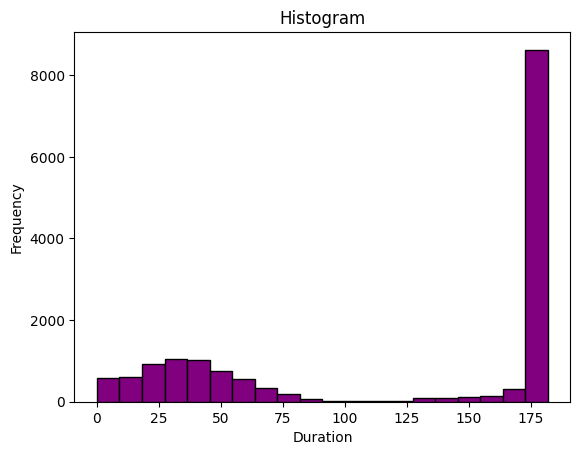

In [ ]:
plt.hist(data['Duration'],bins=20,color='purple',edgecolor='black')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

**Count Plot**

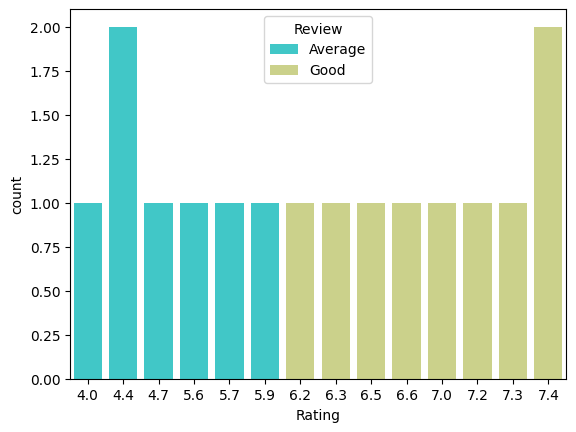

In [ ]:
count=data.head(30)
sns.countplot(x='Rating',data=count,hue='Review',palette='rainbow')
plt.show()

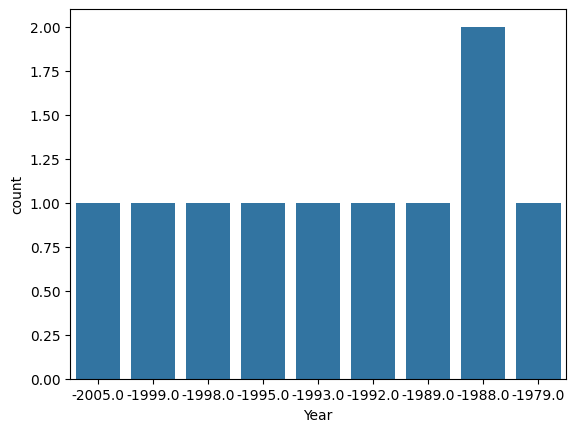

In [ ]:
df=data.tail(10)
sns.countplot(x='Year',data=df)
plt.show()

**Scatter Plot**

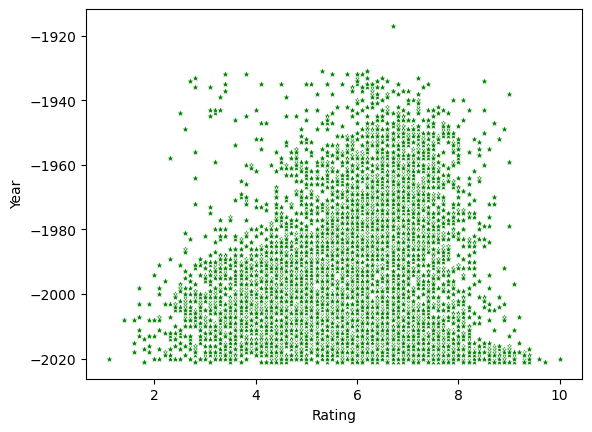

In [ ]:
sns.scatterplot(x='Rating',y='Year',data=data,color='green',marker='*')
plt.show()

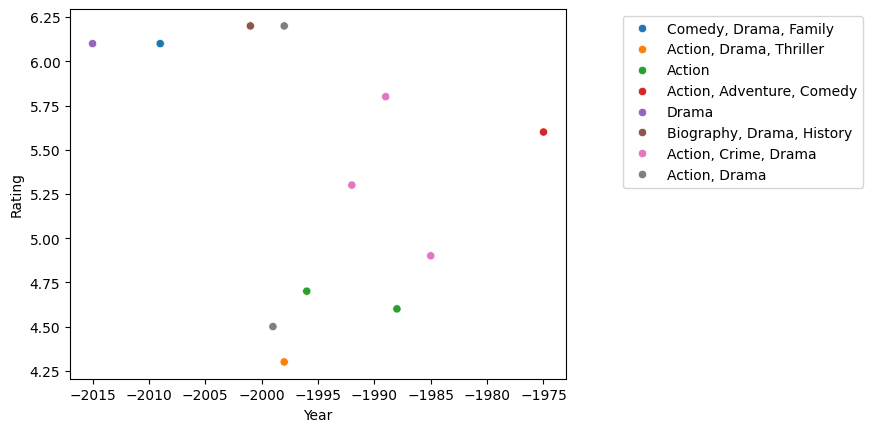

In [ ]:
gen=data.tail(20)
sns.scatterplot(x='Year',y='Rating',hue='Genre',data=gen)
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

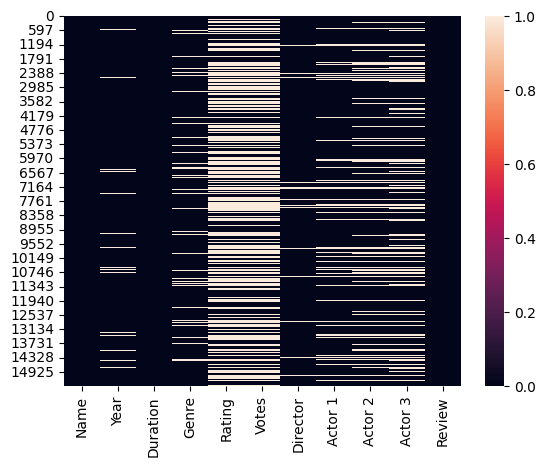

In [ ]:
sns.heatmap(data.isnull())
plt.show()

**Bar Plot**

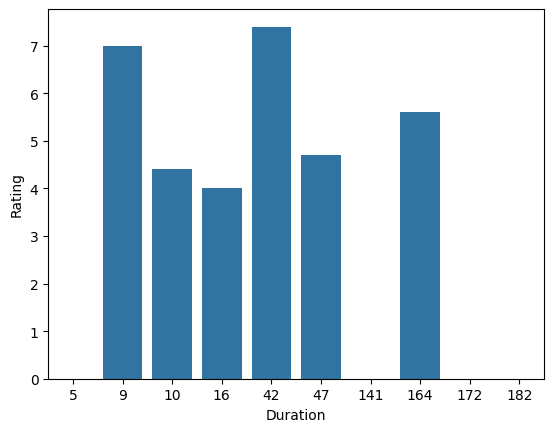

In [ ]:
df=data.head(10)
sns.barplot(x='Duration',y='Rating',data=df)
plt.show()

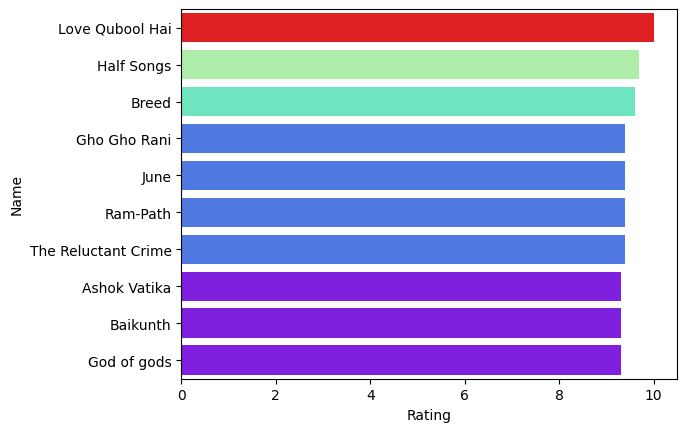

In [ ]:
sns.barplot(x='Rating',y='Name',hue='Rating',legend=False,data=high_rating,palette='rainbow')
plt.show()

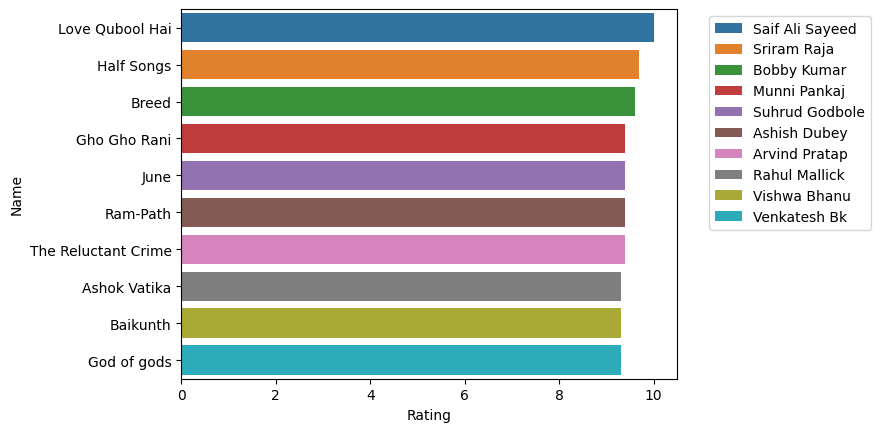

In [ ]:
sns.barplot(x='Rating',y='Name',data=top,hue='Director')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.show()

In [ ]:
def rating(rating):
    if rating>=8:
       return"Excellent"
    elif rating>=6:
       return "Good"
    else:
       return "Average"
data['Review']=data['Rating'].apply(rating)
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Review
0,,NaN,182,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Average
1,#Gadhvi (He thought he was Gandhi),-2019.0,9,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Good
2,#Homecoming,-2021.0,172,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Average
3,#Yaaram,-2019.0,10,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Average
4,...And Once Again,-2010.0,5,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Average


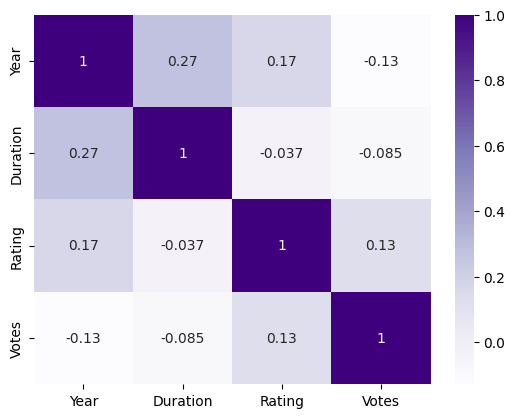

In [ ]:
correlation=data.corr(numeric_only=True)
sns.heatmap(correlation,annot=True,cmap='Purples')
plt.show()

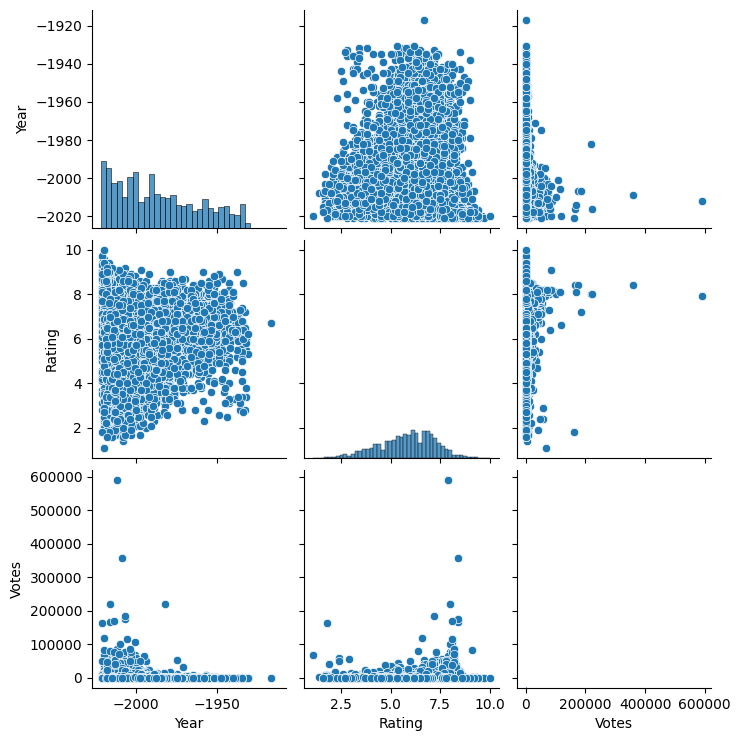

In [ ]:
plot=['Year','Rating','Votes']
sns.pairplot(data[plot])
plt.show()